# Slope Example

In [1]:
import matplotlib.pyplot as plt


from mintalib.samples import sample_prices
from mintalib.indicators import SMA, EMA, EVAL, SLOPE, LOG

plt.rc("figure", figsize=(12, 9))

In [2]:
prices = sample_prices()

prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11056 entries, 1980-12-12 to 2024-10-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    11056 non-null  float64
 1   high    11056 non-null  float64
 2   low     11056 non-null  float64
 3   close   11056 non-null  float64
 4   volume  11056 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 518.2 KB


In [3]:
# Slope (logarithmic)

prices = prices.assign(
    slope = SLOPE(20) @ LOG(),
)

prices


,open,high,low,close,volume,slope
date,,,,,,
1980-12-12,0.098943,0.099373,0.098943,0.098943,469033600,NaN
1980-12-15,0.094211,0.094211,0.093781,0.093781,175884800,NaN
1980-12-16,0.087328,0.087328,0.086898,0.086898,105728000,NaN
1980-12-17,0.089049,0.089479,0.089049,0.089049,86441600,NaN
1980-12-18,0.091630,0.092061,0.091630,0.091630,73449600,NaN
...,...,...,...,...,...,...
2024-10-15,233.610001,237.490005,232.369995,233.850006,64751400,0.000878
2024-10-16,231.600006,232.119995,229.839996,231.779999,34082200,0.000664
2024-10-17,233.429993,233.850006,230.520004,232.149994,32993800,0.000974


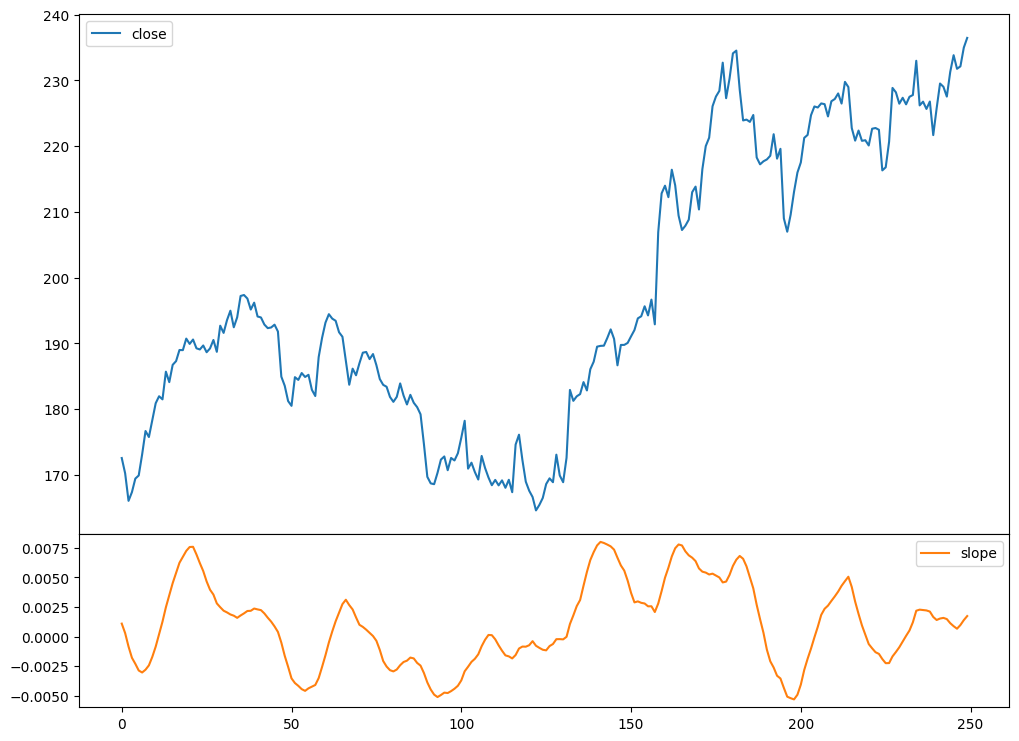

In [4]:
axes = prices.tail(250).plot(
    y=["close", "slope"],
    use_index=False,
    subplots=True,    
)


# ax = plt.gca()
ax = axes[-1]
gs = ax.get_gridspec()
gs.set_height_ratios([3, 1])
gs.update(hspace=0.0)

# plt.subplots_adjust(hspace=0.0)